In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from utils import *

In [2]:
# meshgrid for deep, fno
x = np.linspace(-1, 1, 24)
[X2, Y2] = np.meshgrid(x, x)

# meshgrid for ours
x_lgl, w_lgl = legendre_gauss_lobatto(24)
[Y1, X1] = np.meshgrid(x_lgl, x_lgl, indexing='ij') 
W2D = np.outer(w_lgl, w_lgl)

In [3]:
U_bar = lambda x, n: np.sqrt(x[2, n]**2 + x[3, n]**2)
U_ex  = lambda x, n: np.sqrt(x[0, n]**2 + x[1, n]**2)
err_U = lambda x, n: np.abs(U_bar(x, n) - U_ex(x, n))

Text(0.08, 0.425, 'Errors')

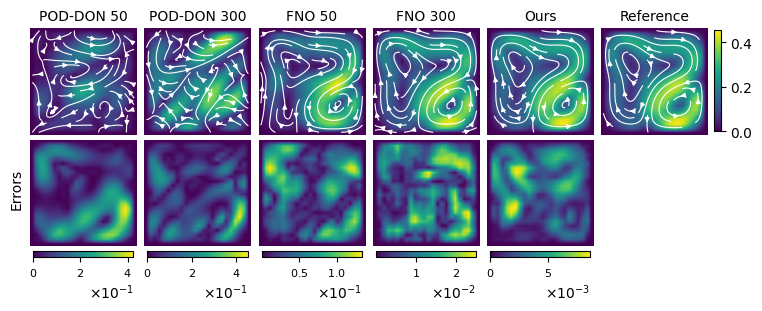

In [ ]:
n = 4 
t = 1.0 

data50  = scipy.io.loadmat(f'./data/fig2_clean/50sigma5_t{t:.1f}.mat')
data300 = scipy.io.loadmat(f'./data/fig2_clean/300sigma5_t{t:.1f}.mat')

# data50  = scipy.io.loadmat(f'./data/fig2_noise/50noise_t{t:.1f}.mat')
# data300 = scipy.io.loadmat(f'./data/fig2_noise/300noise_t{t:.1f}.mat')

fig, ax = plt.subplots(2, 6, figsize=(8.75, 3.75))
fig.subplots_adjust(
    left=0.1,  
    right=0.8, 
    top=0.9,  
    bottom=0.2,
    wspace=0.025, 
    hspace=0.05
    )

title_fontsize = 10

ref = interpolate_to_uniform(U_ex(data300['our'], n).T, 24)
maxU = ref.max()
minU = ref.min()

ax[0,0].imshow(U_bar(data50['deep'], n).T, vmin=minU, vmax=maxU, interpolation='bilinear')
ax[0,1].imshow(U_bar(data300['deep'], n).T, vmin=minU, vmax=maxU, interpolation='bilinear')
ax[0,2].imshow(U_bar(data50['fno'], n).T, vmin=minU, vmax=maxU, interpolation='bilinear')
ax[0,3].imshow(U_bar(data300['fno'], n).T, vmin=minU, vmax=maxU, interpolation='bilinear')
ax[0,4].imshow(interpolate_to_uniform(U_bar(data300['our'], n).T, 24), vmin=minU, vmax=maxU, interpolation='bilinear')
img = ax[0,5].imshow(ref, vmin=minU, vmax=maxU, interpolation='bilinear')

ax[0,0].streamplot(np.arange(24), np.arange(24), data50['deep'][2, n].T, data50['deep'][3, n].T, density=0.5, linewidth=0.8, arrowsize=0.7, color='white')
ax[0,1].streamplot(np.arange(24), np.arange(24), data300['deep'][2, n].T, data300['deep'][3, n].T, density=0.5, linewidth=0.8, arrowsize=0.7, color='white')
ax[0,2].streamplot(np.arange(24), np.arange(24), data50['fno'][2, n].T, data50['fno'][3, n].T, density=0.5, linewidth=0.8, arrowsize=0.7, color='white')
ax[0,3].streamplot(np.arange(24), np.arange(24), data300['fno'][2, n].T, data300['fno'][3, n].T, density=0.5, linewidth=0.8, arrowsize=0.7, color='white')
ax[0,4].streamplot(np.arange(24), np.arange(24), interpolate_to_uniform(data300['our'][2, n].T, 24), interpolate_to_uniform(data300['our'][3, n].T, 24), density=0.5, linewidth=0.8, arrowsize=0.7, color='white')
ax[0,5].streamplot(np.arange(24), np.arange(24), interpolate_to_uniform(data300['our'][0, n].T, 24), interpolate_to_uniform(data300['our'][1, n].T, 24), density=0.5, linewidth=0.8, arrowsize=0.7, color='white')

ax[0,0].set_title('POD-DON 50', fontsize=title_fontsize)
ax[0,1].set_title('POD-DON 300', fontsize=title_fontsize)
ax[0,2].set_title('FNO 50', fontsize=title_fontsize)
ax[0,3].set_title('FNO 300', fontsize=title_fontsize)
ax[0,4].set_title('Ours', fontsize=title_fontsize)
ax[0,5].set_title('Reference', fontsize=title_fontsize)

fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.885, 0.625, 0.007, 0.27])    
cbar = fig.colorbar(img, cax=cbar_ax)

def ax_error(ax, j, U):
    im = ax[1,j].imshow(U, interpolation='bilinear')
    cbar = fig.colorbar(im, ax=ax[:,j], location='bottom', shrink=0.9, pad=0.02)
    cbar.formatter = ticker.ScalarFormatter(useMathText=True)
    cbar.formatter.set_scientific(True)
    cbar.formatter.set_powerlimits((0, 0))  
    cbar.update_ticks()
    cbar.ax.tick_params(labelsize=8) 
    cbar.ax.xaxis.offsetText.set_fontsize(10)

    if j==5:
        cbar.ax.patch.set_facecolor('white')
        cbar.ax.set_visible(False)
        cbar.set_ticks([])

ax_error(ax, 0, err_U(data50['deep'], n))
ax_error(ax, 1, err_U(data300['deep'], n))
ax_error(ax, 2, err_U(data50['fno'], n))
ax_error(ax, 3, err_U(data300['fno'], n))
ax_error(ax, 4, interpolate_to_uniform(err_U(data300['our'], n), 24))
ax_error(ax, 5, np.full((24, 24), np.nan))

def config(ax):
    ax.axis('off')

for i in range(2):
    for j in range(6):
        config(ax[i,j])

fig.text(0.08, 0.425, 'Errors', rotation=90, fontsize=title_fontsize)

In [5]:
# Color blind palette
sns.set_palette("colorblind")
palette = sns.color_palette("colorblind")

In [11]:
num_samples = [10, 50, 100, 300, 600]
timestamps = [0.2, 0.4, 0.6, 0.8, 1.0]

deep = np.zeros((len(timestamps), len(num_samples)))
fno  = np.zeros((len(timestamps), len(num_samples)))
ours = np.zeros((len(timestamps), len(num_samples)))
for j in range(len(num_samples)):
    data = scipy.io.loadmat(f'./data/fig2_clean/sigma5error_{num_samples[j]}.mat')
    # data = scipy.io.loadmat(f'./data/fig2_noise/noiseerror_{num_samples[j]}.mat')
    deep[:, j] = data['deep'].mean(axis=1)
    fno[:, j]  = data['fno'].mean(axis=1)
    ours[:, j] = data['our'].mean(axis=1)


Text(0, 0.5, 'Rel. $L_x^2$ Error')

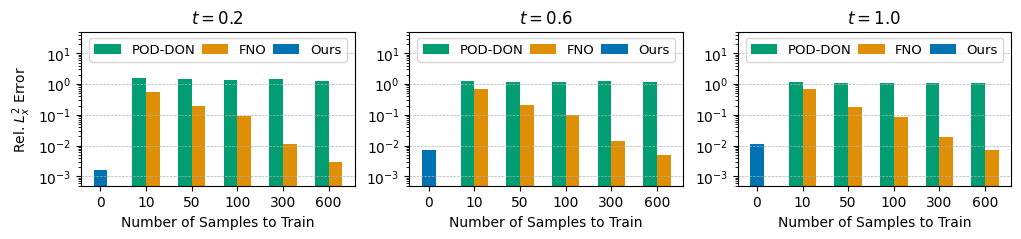

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(12, 2)) 

t_idxs = [0, 2, 4]

x = np.arange(len(num_samples)+1)
bar_width = 0.3

for i, t_idx in enumerate(t_idxs):
    ax[i].bar(x[1:] - bar_width / 2, deep[t_idx], width=bar_width, label='POD-DON', color=palette[2])
    ax[i].bar(x[1:] + bar_width / 2, fno[t_idx], width=bar_width, label='FNO', color=palette[1])
    ax[i].bar(x[0], ours[t_idx, -1], width=bar_width, label='Ours', color=palette[0])

    ax[i].set_xticks(x, ['0'] + num_samples)
    ax[i].set_yscale('log')
    ax[i].set_yticks([1e-3, 1e-2, 1e-1, 1, 1e1])
    ax[i].yaxis.grid(True, linestyle='--', linewidth=0.5)
    ax[i].set_xlabel('Number of Samples to Train')
    ax[i].set_ylim(bottom=5e-4, top=5e1)

    ax[i].set_title(f'$t = {timestamps[t_idx]}$')
    ax[i].legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.0), columnspacing=0.5, labelspacing=0.1, fontsize=9.5)

ax[0].set_ylabel('Rel. $L_x^2$ Error')

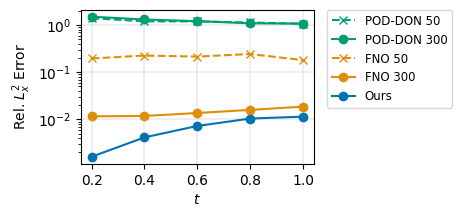

In [13]:
fig, ax = plt.subplots(figsize=(3,2))

ax.plot(timestamps, deep[:,1], label='POD-DON 50', color=palette[2], linestyle='--', marker='x')
ax.plot(timestamps, deep[:,3], label='POD-DON 300', color=palette[2], marker='o')
ax.plot(timestamps, fno[:,1], label='FNO 50', color=palette[1], linestyle='--', marker='x')
ax.plot(timestamps, fno[:,3], label='FNO 300', color=palette[1], marker='o')
ax.plot(timestamps, ours[:,-1], label='Ours', color=palette[0], marker='o')

ax.set_yscale('log')
ax.set_xlabel(rf'$t$')
ax.set_ylabel(rf'Rel. $L_x^2$ Error')
ax.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.grid(True, linewidth=0.3)

fig.legend(loc='center left', bbox_to_anchor=(0.925, 0.635), fontsize=8.5)